In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

# Chapter 4
1- Use the section “Applying the Monte Carlo method for Pi estimation” on Page 91 of the book and use Python codes to calculate Pi. NOTE: Instead of 1⁄4 of the circle (depicted in Figure 4.2), use half (1/2) of the circle and redo the exercise accordingly.

a. Repeat the Python code using N = 100, 1000, 10000. Explain about the initial value and the role of Large Numbers in the calculation of Pi number. Explain all the codes, all functions, and different methodology in Python.



Here are three outputs of Monte Carlo method, 100, 1000, 10000 times separately. Running larger samples will reduce the confidence intervals further, and will increase model accuracy. In order to produce a precise result with running model, we need more sample sizes. If we run n time with large sizes (such as 10000 below), we can estimate Pi more accurate.

N = 100 M = 79 Pi = 3.16


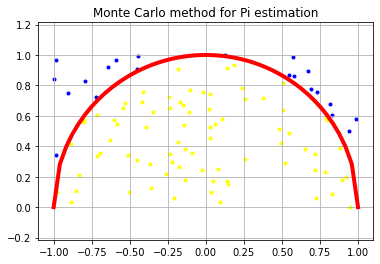

In [5]:
N = 100 # random numbers that we generated
M = 0 # the number of points that fall in the circular sector, default is 0
# create the array to save the vectors that will contain the coordinates of the points
XCircle=[]  # circle x
YCircle=[]  # circle y
XSquare=[]  # square x
YSquare=[]  # square y

for p in range(N):
    x=random.uniform(-1, 1) # random number to generate the points between -1 to 1 so we have a half circle
    y=random.uniform(0, 1)
    # (x - x0)^2 + (y - y0)^2 = r^2
    if (x**2 + y**2 <= 1):
        M += 1 # condition is satisfied, meaning that x and y fall into circle so m add 1
        XCircle.append(x)  
        YCircle.append(y)        
    else:
        XSquare.append(x)  
        YSquare.append(y)
    Pi = (4)*M/N  #calculate the pi

print("N = %d M = %d Pi = %.2f" %(N,M ,Pi))

XLin=np.linspace(-1,1) 

YLin=[]

for x in XLin:
    YLin.append(math.sqrt(1-x**2))

plt.axis('equal')                            
plt.grid(which='major')                        
plt.plot(XLin , YLin, color='red' , linewidth='4')
plt.scatter(XCircle, YCircle, color='yellow', marker ='.')
plt.scatter(XSquare, YSquare, color='blue'  , marker ='.')
plt.title('Monte Carlo method for Pi estimation')
plt.show() 

N = 1000 M = 804 Pi = 3.22


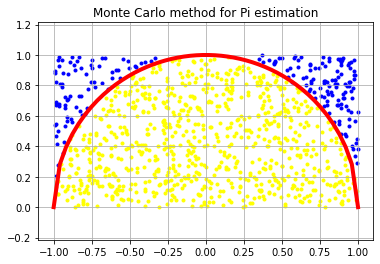

In [4]:
N = 1000 # random numbers that we generated
M = 0 # the number of points that fall in the circular sector, default is 0
# create the array to save the vectors that will contain the coordinates of the points
XCircle=[]  # circle x
YCircle=[]  # circle y
XSquare=[]  # square x
YSquare=[]  # square y

for p in range(N):
    x=random.uniform(-1, 1) # random number to generate the points between -1 to 1 so we have a half circle
    y=random.uniform(0, 1)
    # (x - x0)^2 + (y - y0)^2 = r^2
    if (x**2 + y**2 <= 1):
        M += 1 # condition is satisfied, meaning that x and y fall into circle so m add 1
        XCircle.append(x)  
        YCircle.append(y)        
    else:
        XSquare.append(x)  
        YSquare.append(y)
    Pi = (4)*M/N  #calculate the pi

print("N = %d M = %d Pi = %.2f" %(N,M ,Pi))

XLin=np.linspace(-1,1) 

YLin=[]

for x in XLin:
    YLin.append(math.sqrt(1-x**2))

plt.axis('equal')                            
plt.grid(which='major')                        
plt.plot(XLin , YLin, color='red' , linewidth='4')
plt.scatter(XCircle, YCircle, color='yellow', marker ='.')
plt.scatter(XSquare, YSquare, color='blue'  , marker ='.')
plt.title('Monte Carlo method for Pi estimation')
plt.show() 

N = 10000 M = 7887 Pi = 3.15


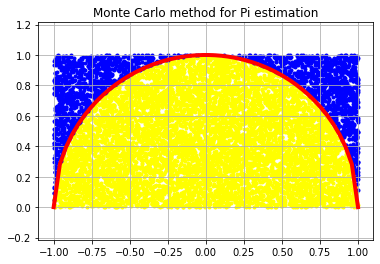

In [105]:
N = 10000 # random numbers that we generated
M = 0 # the number of points that fall in the circular sector, default is 0
# create the array to save the vectors that will contain the coordinates of the points
XCircle=[]  # circle x
YCircle=[]  # circle y
XSquare=[]  # square x
YSquare=[]  # square y

for p in range(N):
    x=random.uniform(-1, 1) # random number to generate the points between -1 to 1 so we have a half circle
    y=random.uniform(0, 1)
    # (x - x0)^2 + (y - y0)^2 = r^2
    if (x**2 + y**2 <= 1):
        M += 1 # condition is satisfied, meaning that x and y fall into circle so m add 1
        XCircle.append(x)  
        YCircle.append(y)        
    else:
        XSquare.append(x)  
        YSquare.append(y)
    Pi = (4)*M/N  #calculate the pi

print("N = %d M = %d Pi = %.2f" %(N,M ,Pi))

XLin=np.linspace(-1,1) 

YLin=[]

for x in XLin:
    YLin.append(math.sqrt(1-x**2))

plt.axis('equal')                            
plt.grid(which='major')                        
plt.plot(XLin , YLin, color='red' , linewidth='4')
plt.scatter(XCircle, YCircle, color='yellow', marker ='.')
plt.scatter(XSquare, YSquare, color='blue'  , marker ='.')
plt.title('Monte Carlo method for Pi estimation')
plt.show() 

2- Estimate the expected value of a random variable as established by the law of large numbers in Page 97. To this end, generate 10,000 random numbers with a uniform distribution and then extract 100 samples from this population, also taken randomly (resulting in samples with 1000 numbers). (Note that in the book we had vice versa and had 1000 samples). Repeat this operation for a consistent number of times and store the results in a vector. Finally draw a histogram of the distribution that we have obtained. Compare your result with the figures in the book and explain which approach better explains the central limit theorem.

The Central Limit Theorem indicates that if we take samples of n from any populatuion, and we know the population has mean μ and a finite standard deviation σ, then, for large n, we get the Y-bar, which is sample mean. And the distribution of Y-bar is approximately normal, and Y- bar’s mean is equal to μ, and the standard error of Y-bar is σ over the square root of n. According to the Central Limit Theorem, if we extract the sampling distribution of the mean with large size, meaning that the result will more close to normal distribution.

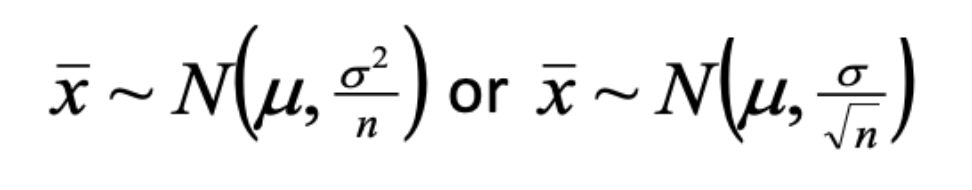

In [ ]:
a = 1 # the extreme small random sample in n times
b = 100 # the extreme large random sample in n times
n = 10000 # the number of the samples
DataPop=list(np.random.uniform(a,b,n)) # generate the uniform distribution

plt.hist(DataPop, density = True, histtype = 'stepfilled', alpha=0.5) # plot a histogram in order to verify these samplea are following uniform distribution 
plt.show() # show the histogram

SamplesMeans = []
for i in range(0,1000):
    DataExtracted = random.sample(DataPop,k = 1000) # extract 1000 samples from the population without reproducing the values and without changing the input sequence.
    DataExtractedMean = np.mean(DataExtracted) # calculate the sample means
    SamplesMeans.append(DataExtractedMean) # append in a new array

plt.figure()
plt.hist(SamplesMeans, density = True, histtype='stepfilled', alpha=0.5, color = "green")
plt.show()

3- Use the integration methodology using Monte Carlo in Page 104 to calculate the following two integrals. In addition, use Visual representation method in Page 112 to draw the Plot of numerical integration results.
a) 𝐼=∫!2𝑥/(2−𝑥)𝑑𝑥 "
b) 𝐼=∫#𝑥#𝑑𝑥 $


In [ ]:
random.seed(2)
f = lambda x: (x*2/(2-x)) # using syntax without define a new function 
a = 0.0
b = 5.0
NumSteps = 1000000
XIntegral=[]  
YIntegral=[]
XRectangle=[]  
YRectangle=[]

ymin = f(a)
ymax = ymin
# extract min and max in the distribution
for i in range(NumSteps):
    x = a + (b - a) * float(i) / NumSteps # calculate the rectangle area
    y = f(x)
    if y < ymin: 
      ymin = y
    if y > ymax: 
      ymax = y

# applying in Monte Carlo method
A = (b - a) * (ymax - ymin)
N = 1000000 # set the numbers of random pairs we want to generate
M = 0 # the number of points that fall under the curve that represents f(x)
for k in range(N):
    x = a + (b - a) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if y <= f(x):
            M += 1 
            XIntegral.append(x)
            YIntegral.append(y)  
    else:
            XRectangle.append(x) 
            YRectangle.append(y)              
NumericalIntegral = M / N * A
print ("Numerical integration = " + str(NumericalIntegral))

XLin=np.linspace(a,b)
YLin=[]
for x in XLin:
    YLin.append(f(x))

plt.axis   ([0, b, 0, f(b)])                                            
plt.plot   (XLin,YLin, color="red" , linewidth="4") 
plt.scatter(XIntegral, YIntegral, color="blue", marker   =".") 
plt.scatter(XRectangle, YRectangle, color="yellow", marker   =".")
plt.title  ("Numerical Integration using Monte Carlo method")
plt.show()


In [ ]:
random.seed(1)
f = lambda x: pow(x, 3) # using syntax without define a new function 
a = 1.0
b = 3.0
NumSteps = 1000000
XIntegral=[]  
YIntegral=[]
XRectangle=[]  
YRectangle=[]

ymin = f(a)
ymax = ymin
# extract min and max in the distribution
for i in range(NumSteps):
    x = a + (b - a) * float(i) / NumSteps # calculate the rectangle area
    y = f(x)
    if y < ymin: 
      ymin = y
    if y > ymax: 
      ymax = y

# applying in Monte Carlo method
A = (b - a) * (ymax - ymin)
N = 1000000 # set the numbers of random pairs we want to generate
M = 0 # the number of points that fall under the curve that represents f(x)
for k in range(N):
    x = a + (b - a) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if y <= f(x):
            M += 1 
            XIntegral.append(x)
            YIntegral.append(y)  
    else:
            XRectangle.append(x) 
            YRectangle.append(y)              
NumericalIntegral = M / N * A
print ("Numerical integration = " + str(NumericalIntegral))

XLin=np.linspace(a,b)
YLin=[]
for x in XLin:
    YLin.append(f(x))

plt.axis   ([1, b, 1, f(b)])                                            
plt.plot   (XLin,YLin, color="red" , linewidth="4") 
plt.scatter(XIntegral, YIntegral, color="blue", marker   =".") 
plt.scatter(XRectangle, YRectangle, color="yellow", marker   =".")
plt.title  ("Numerical Integration using Monte Carlo method")
plt.show()
